## Model Representation
### <a name="univariate linear regression"></a>Linear regression with one variable

In our example, we want to predict prices of houses in Portland, Oregon. The goal is to train an algorithm to learn parameters which we later can use to predict the price of a house based on the features that we have learned. Since the price of a house is a continuous, real-valued number, we are dealing with a **(linear) regression** problem. Further, since we know the price of each house in the training set and thus know the "right" answer/ground truth, we have a **supervised learning problem**.

For now, we want to restrict ourselves **univariate linear regression** which means that we predict the price only based on one feature (here the area in m<sup>2</sup>). Our algorithm should look like this: From a training set, it should learn a hypotheses $h(x)$ which shall predict the price of a house.

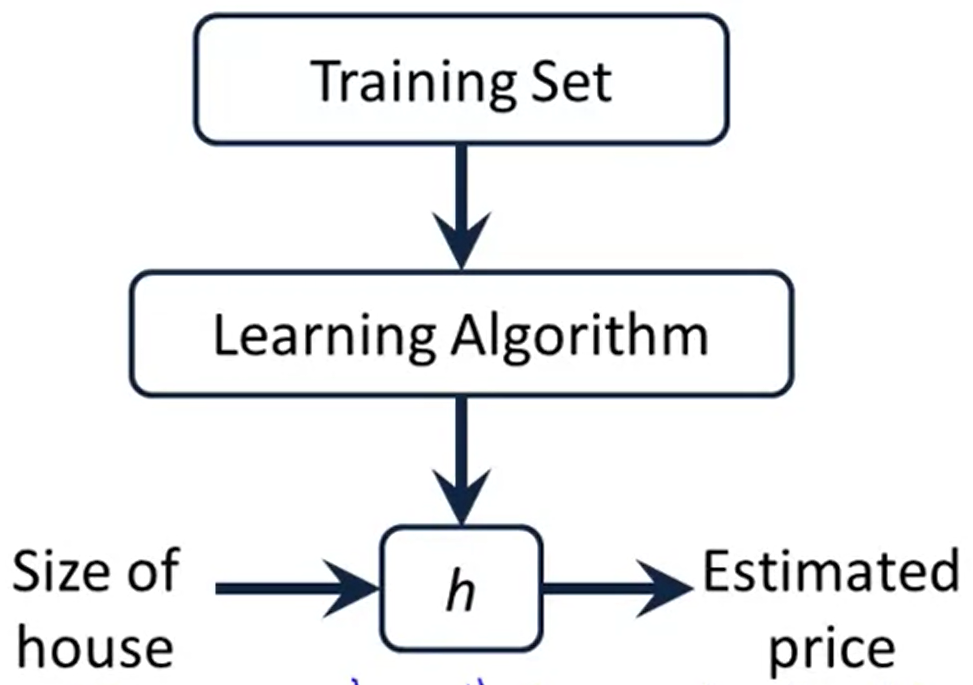

We start predicting the house prices by loading the houses.csv file which contains our dataset and by plotting the datapoints into a scatter plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from PIL import Image

In [2]:
%%html
<link rel="stylesheet" href="css/style.css">

In [3]:
houses = pd.read_csv('../data/week1/houses.csv')
houses = houses.drop('Bedrooms', axis=1)
houses.head()

,Area,Price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


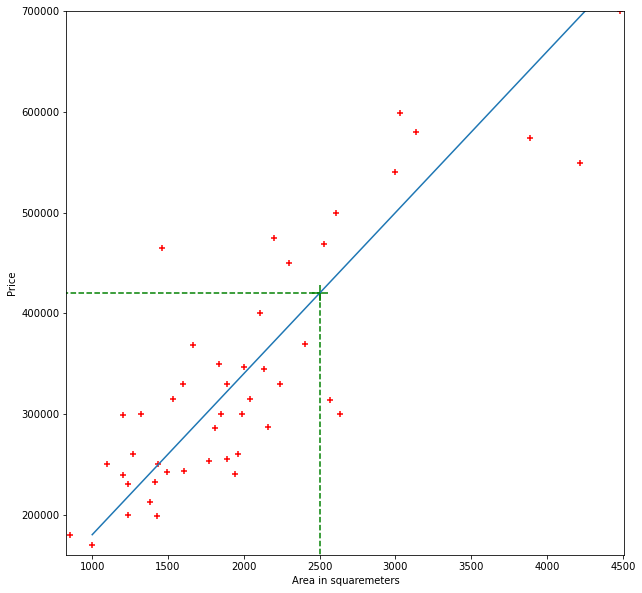

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(houses['Area'], houses['Price'], color='r', marker='+')
ax.set_xlabel('Area in squaremeters')
ax.set_xlim(830, 4510)
ax.set_ylabel('Price')
ax.set_ylim(160000, 700000)
plt.plot([1000,4500], [180000,740000], linestyle='solid')

#Predict the green value
ax.scatter([2500], [420000], color='g', marker='+', s=250)
plt.plot([2500,2500], [0,420000], linestyle='dashed', color='g')
plt.plot([0,2500], [420000,420000], linestyle='dashed', color='g')
plt.show()

When plotting our data, we can approximately see that there is a linear correlation between the **price** and the **area** of the house. The bigger the area, the higher the price.

If we want to know the price of a house for a given area, we can predict this price by finding the most accurate accurate line through our data-points. In the example below, I approximated this line in blue. This line will take the form $y = a + bx$ and if we know $a$ and $b$, we can approximate the price of a house by computing $y$.

In the example below, the plotted line is $y = 20,000 + 160x$ and therefore a house with an area of 2500 would cost approximately 420,000€ (green dashed line)

Before we get started with classification, we define some **notations**:

- m = Number of training examples
- x = "input" variable/feature
- y = "output" variable/"target" variable
- (x,y) = a single training example
- (x<sup>(i)</sup>,y<sup>(i)</sup>) = the i<sup>th</sup> training example

We write the hypothesis $h_\theta (x)$ (in the code cells, $h_\theta (x)$ will be call $\hat{y}(x)$) as shown in equation \ref{eq1}: <br>

\begin{align}
h_\theta (x) = \theta_0 + \theta_1 \cdot x + \dots \label{eq1}\tag{1}
\end{align}<br>

Our goal is to choose our $\theta_i$ parameters such that the hypothesis function $h_\theta (x)$ is close to $y$ in our training examples. To archive this, we need to define a **cost function** $J(\theta_0, \theta_1)$.

### <a name="cost_function"></a>Cost function

We define our cost function as a measure on how good our predictions are. If we settle on a set of $\theta$ parameters, we can compute our predictions $h_{\theta}(x)$ for the samples in our training set. Since we know the correct value, we can compute the error $e_i$ for each training sample as $e_{i} = h_{\theta}(x^(i)) - y^(i)$

Taking the average over all training samples gives us the average error. However, since the error can be both, positive and negative, we want make sure that they don't cancel each other out. We do this by squaring the errors. This results in our cost function:

\begin{align}
J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^{m}(e_i)^2 = \frac{1}{2m}\sum_{i=1}^{m} (h_\theta (x)-y)^2  \label{cost_function_1}\tag{2}
\end{align}<br>

Notice the $\frac{1}{2}$ that we added to the cost function. We did this since it makes the math a little bit easier as we will later take the derivative of our cost function which cancels out the $\frac{1}{2}$.

The cost function in this specific case is the **mean squared error (MSE)** function. While there are other functions, the MSE works reasonably well for regression problems and is one of the most used ones in linear regression. 

Our goal is to find parameters such that the cost function is minimised. This will optimise our hypothesis function and we can do that by setting the parameters such that: $\min_{\theta_0, \theta_1} J(\theta_0, \theta_1)$

### Visualising the cost function
Before we continue with our housing example, let's visualize the cost function along on a simplified example. For this example, we will set $\theta_0 = 0$. This means that all of our hypothesis functions will pass through the origin. 

Example:


| x | y |
|---|---|
| 1 | 1 |
| 2 | 2 |
| 3 | 3 |

For these three data-points we will see how our cost function behaves. Now obviously, these points lie on the function $y=x$ and if we plot this, our cost function will be $J(\theta)=0$. To visualise this, we will set $\theta_1 = 1$ and take a look at our predictions and the cost.

| x | y | $h_\theta (x)$ | ($h_\theta (x^{(i)}) - y^{(i)})^2$
|:---:|:---:|:---:|:---:|
| 1 | 1 | 1 | 0 |
| 2 | 2 | 2 | 0 |
| 3 | 3 | 3 | 0 |


Text(0.5, 1.0, 'Cost function (of θ₁))')

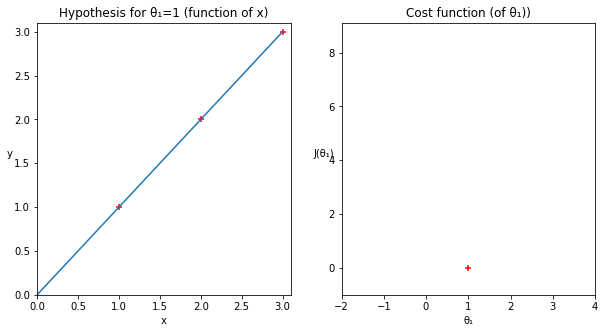

In [5]:
x = np.array([1,2,3])
y = np.array([1,2,3])

fig, (h, J) = plt.subplots(1, 2, figsize=(10,5))
h.scatter(x, y, color='r', marker='+')
h.set_xlabel('x')
h.set_xlim(0, 3.1)
h.set_ylabel('y', rotation=0)
h.set_ylim(0, 3.1)
h.plot([0,3], [0,3], linestyle='solid')
h.set_title("Hypothesis for \u03B8\u2081=1 (function of x)")

J.scatter([1], [0], color='r', marker='+')
J.set_xlabel('\u03B8\u2081')
J.set_xlim(-2, 4)
J.set_ylabel('J(\u03B8\u2081)', rotation=0)
J.set_ylim(-1, 9.1)
J.set_title("Cost function (of \u03B8\u2081))")

In [6]:
def mse(y,y_hat):
    y = np.array(y)
    y_hat = np.array(y_hat)
    return np.sum(np.square(y-y_hat))/(2*len(y))

In [7]:
class Variables(object):
    def __init__(self):
        self.x = np.array([1,2,3])
        self.y = np.array([1,2,3])
        self.cost = []
        self.theta = []

In [8]:
try:
    var = Variables()
    fig, (h, J) = plt.subplots(1, 2, figsize=(10,5))
    
    #Plot values for left graph (hypothesis function)
    line, = h.plot(x,y, lw=2)
    h.scatter(x, y, color='r', marker='+')
    h.set_xlabel('x')
    h.set_xlim(0, 3.1)
    h.set_ylabel('y', rotation=0)
    h.set_ylim(0, 3.1)
    h.set_title("Hypothesis for \u03B8\u2081=[0,2] (function of x)")

    #Plot values for right graph (cost function)
    scat = J.scatter([5], [5], color='r', marker='+')
    line1, = J.plot(x,y, lw=2)
    J.set_xlabel('\u03B8\u2081')
    J.set_xlim(-0.1, 2.1)
    J.set_ylabel('MSE')
    J.set_ylim(0, 3)
    J.set_title("Cost function (of \u03B8\u2081))")

    # initialization function: plot the background of each frame
    def init():
        return line,

    # animation function.  This is called sequentially
    def animate(i,var):
        #Compute new theta
        var.theta = np.append(var.theta, [0.01*i])
        #x array for propper line display
        x = np.array([0,1,2,3])
        #estimate h_theta
        y_hat = np.multiply(x, var.theta[-1])
        #Compute the mse from the predictions and append them to the costs
        error = mse(var.y,y_hat[1:])
        var.cost = np.append(var.cost, error)
        #Draw hypothesis function
        line.set_data(x, y_hat)
        #Display current cost as an x
        scat.set_offsets(np.c_[var.theta[-1], var.cost[-1]])
        #Draw cost function
        line1.set_data(var.theta, var.cost)
        return line,

    anim = animation.FuncAnimation(fig, animate, fargs=(var,), init_func=init,
                                   frames=201, interval=25, blit=True)
#back to 201
    plt.close(anim._fig)
 
    #anim.save("../data/week1/figures/mse_animation.gif", writer=animation.PillowWriter(fps=30))

    display(HTML(anim.to_html5_video()))
    
except:
    print("Cannot load animation. Loading gif instead")
    display(HTML('<img src="../data/week1/figures/mse_animation.gif">'))


Let's see what is happening in the animation above:

The blue line in our left plot shows our predictions from the hypothesis function for $\theta_1$ in the interval [0,2]. The right plot shows the cost function for the corresponding theta parameters. As we can see, the cost function takes the shape of a convex function with one global minimum. Note that in more complex functions, this is not always the case and the function can have multiple local minima. However, it turns out that for linear regression problems, the cost function is always convex. 

Recall that our goal was to minimize the cost of our hypothesis function. We can see that this happens as we approximate the true value of $\theta1 = 1$. The closer we get to $\theta1 = 1$, our cost function also approximates 0.

Let's look at one last example how we compute the cost of a hypothesis function on the example of $\theta1 = 0.5$

Text(0.5, 1.0, 'Cost function (of θ₁))')

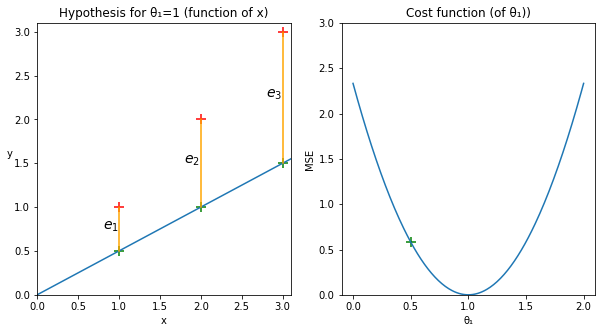

In [9]:
x = np.array([1,2,3])
y = np.array([1,2,3])

y_hat = np.array([0.5,1,1.5])

fig, (h, J) = plt.subplots(1, 2, figsize=(10,5))

h.plot([0,4], [0,2], linestyle='solid')
for i in range(len(x)):
    h.plot([x[i],x[i]], [y[i],y_hat[i]], linestyle='solid', color='orange')
    h.text(x[i]-0.2, (y[i]+y_hat[i])/2, r'$e_{}$'.format(i+1), fontsize=14)
h.scatter(x, y, color='r', marker='+', s=100)
h.scatter(x, y_hat, color='g', marker='+', s=100)
h.set_xlabel('x')
h.set_xlim(0, 3.1)
h.set_ylabel('y', rotation=0)
h.set_ylim(0, 3.1)
h.set_title("Hypothesis for \u03B8\u2081=1 (function of x)")

J.scatter([0.5], [0.583], color='g', marker='+', s=100)
J.plot(var.theta, var.cost, linestyle='solid')
J.set_xlabel('\u03B8\u2081')
J.set_xlim(-0.1, 2.1)
J.set_ylabel('MSE')
J.set_ylim(0, 3)
J.set_title("Cost function (of \u03B8\u2081))")

For $\theta_1 = 0.5$, we can compute our predictions of $h_{0.5}(x)$ for x=[1,2,3]

| x | y | $h_\theta (x)$
|:---:|:---:|:---:|
| 1 | 1 | 0.5 |
| 2 | 2 | 1 |
| 3 | 3 | 1.5 |

Having these predictions, we can compute the error $e_i = (y^{(i)} - h_{0.5} (x^{(i)}))^2$ for every $x^{(i)}$

\begin{align*}
  e_1 &= (y^{(1)} - h_{0.5} (x^{(1)}))^2 &= (1 - 0.5)^2 &= 0.25   \label{cost_example}\tag{3}\\
  e_2 &= (y^{(2)} - h_{0.5} (x^{(2)}))^2 &= (2 - 1)^2 &= 1\\
  e_3 &= (y^{(3)} - h_{0.5} (x^{(3)}))^2 &= (3 - 1.5)^2 &= 2.25
\end{align*}

Wee can see these errors in shown in yellow in the figure above. Having the errors, we can now compute the cost function $J(\theta) = \frac{1}{2m}\sum_{i=1}^{m} e_i$

\begin{align}
J(\theta) = \frac{1}{6}(e_1 + e_2 + e_3) = \frac{1}{6}(0.25 + 1 + 2.25) = 0.583 \label{cost}\tag{4}
\end{align}

The cost for our hypothesis with $\theta = 1$ is 0.583 

## Cost function with multiple parameters

In the example above, our cost function is a single line. However, if we have more parameters, the plot of our cost function increases in dimensionality. For example, if we don't neglect, $\theta_0$ in our hypothesis before, our cost function would look something like this next plot (with different numbers but it illustrates the concept). 

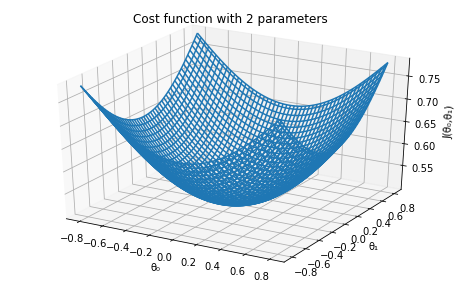

In [10]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig, ax1 = plt.subplots(figsize=(8, 5), subplot_kw={'projection': '3d'})

alpha = 0.8
r = np.linspace(-alpha,alpha,100)
X,Y= np.meshgrid(r,r)
l = 1./(1+np.exp(-(X**2+Y**2)))

ax1.plot_wireframe(X,Y,l)
ax1.set_title("Cost function with 2 parameters")
ax1.set_xlabel("\u03B8\u2080")
ax1.set_ylabel("\u03B8\u2081")
ax1.set_zlabel("J(\u03B8\u2080,\u03B8\u2081)")

plt.show()

We can represent these plots as contour plots. Imagine looking at the bowl plot from above where the colour of the plot shows the depth of the bowl.

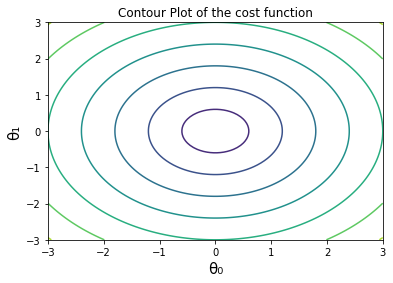

In [11]:
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
fig,ax=plt.subplots(1,1)
cp = ax.contour(X, Y, Z)
ax.set_title('Contour Plot of the cost function')
ax.set_xlabel('\u03B8\u2080', fontsize=15)
ax.set_ylabel('\u03B8\u2081', fontsize=15)
plt.show()

<div>
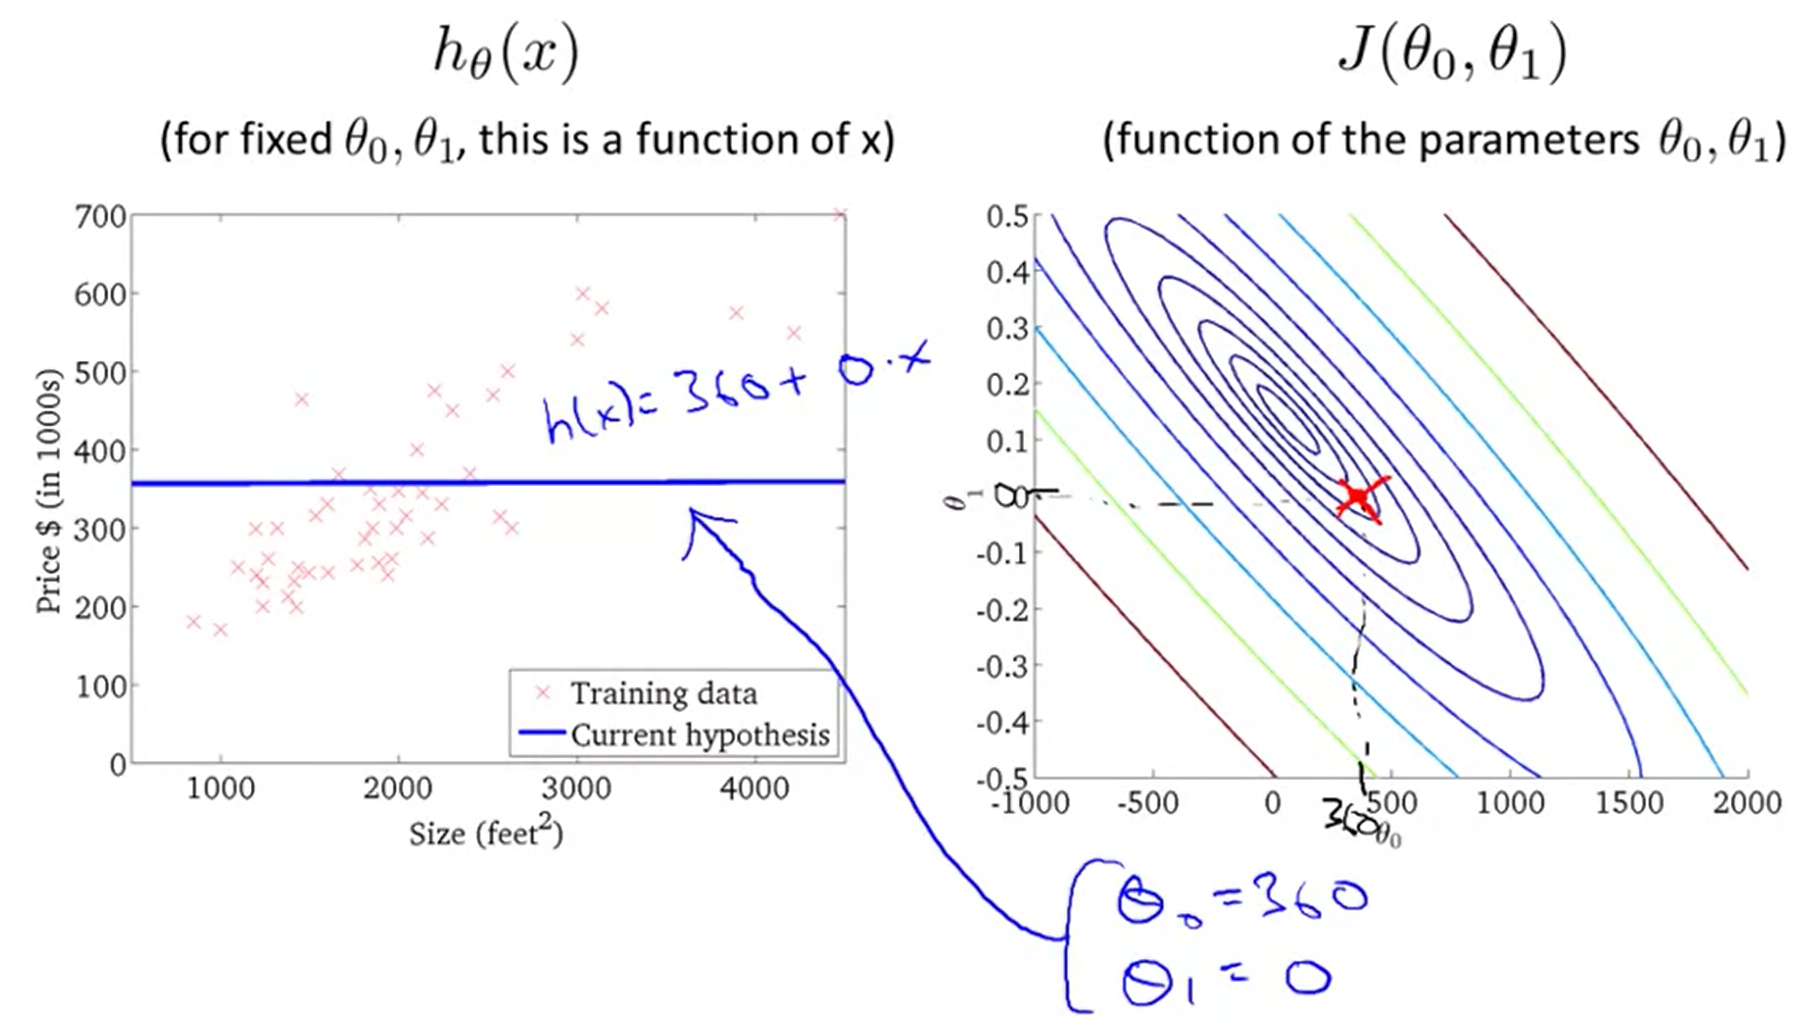
</div>

## Parameter learning
### Gradient descent

Let's look at an algorithm which will automatically minimize the cost function for us.

In general, what gradient descent is doing is:
- Start with some $\theta_0, \theta_1$
- Keep changing $\theta_0, \theta_1$ to reduce $J(\theta_0, \theta_1)$ until we end up in a minimum

Essentially, in each iteration, gradi'ent descent takes one small step towards the minimum by computing the derivative of the cost function. The step size is determined by a learning parameter $\alpha$. Depending on the initial $\theta_0, \theta_1$, we might end up in different local minima.

repeat until convergence {<br>
&emsp;&emsp;$\theta_j$$ := \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta_0,\theta_1)$ (for j=0 and j=1)<br>
}

It is important that we simultaneously update our $\theta$ values as otherwise we will not update them properly. If we don't do that, then our calculation for $\theta_{i+1}$ if we update them individually. That is because we will compute the value of $\theta_{i+1}$ with a different cost function (updated $\theta_i$) than we did for $\theta_i$.

The image below shows an illustration of the gradient descent algorithm. Imagine we start on top of the hill and gradually find our way to the bottom. If we would start at the left $x$, then we would end up in a different local minimum.
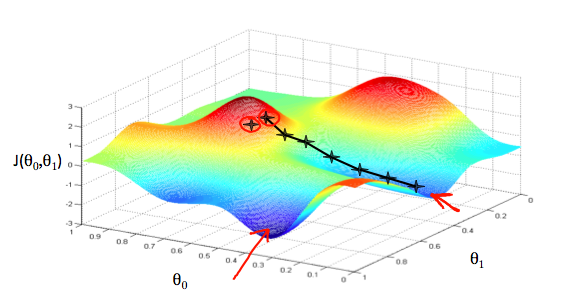

If we go back to the simplified example, we can see how the gradient descent works. If we compute the derivative our cost function 

\begin{align}
    \theta_1 &:= \theta_1 - \alpha\frac{d}{d\theta_1}\left(\frac{1}{2m}\sum_{i=1}^{m} (h_{\theta}(x)-y)^2\right)\\
    \theta_1 &:= \theta_1 - \alpha\frac{d}{d\theta_1}J(\theta_1)\\
    \theta_1 &:= \theta_1 - \alpha\frac{d}{d\theta_1}\left(\frac{1}{2m}\sum_{i=1}^{m} (\theta_1\cdot x-y)^2\right)\\
    \theta_1 &:= \theta_1 - \alpha\left(\frac{1}{2m}\sum_{i=1}^{m} 2(\theta_1\cdot x-y)\right)\\
    \theta_1 &:= \theta_1 - \alpha\left(\frac{1}{m}\sum_{i=1}^{m} h_\theta - y \right)\\
\end{align}

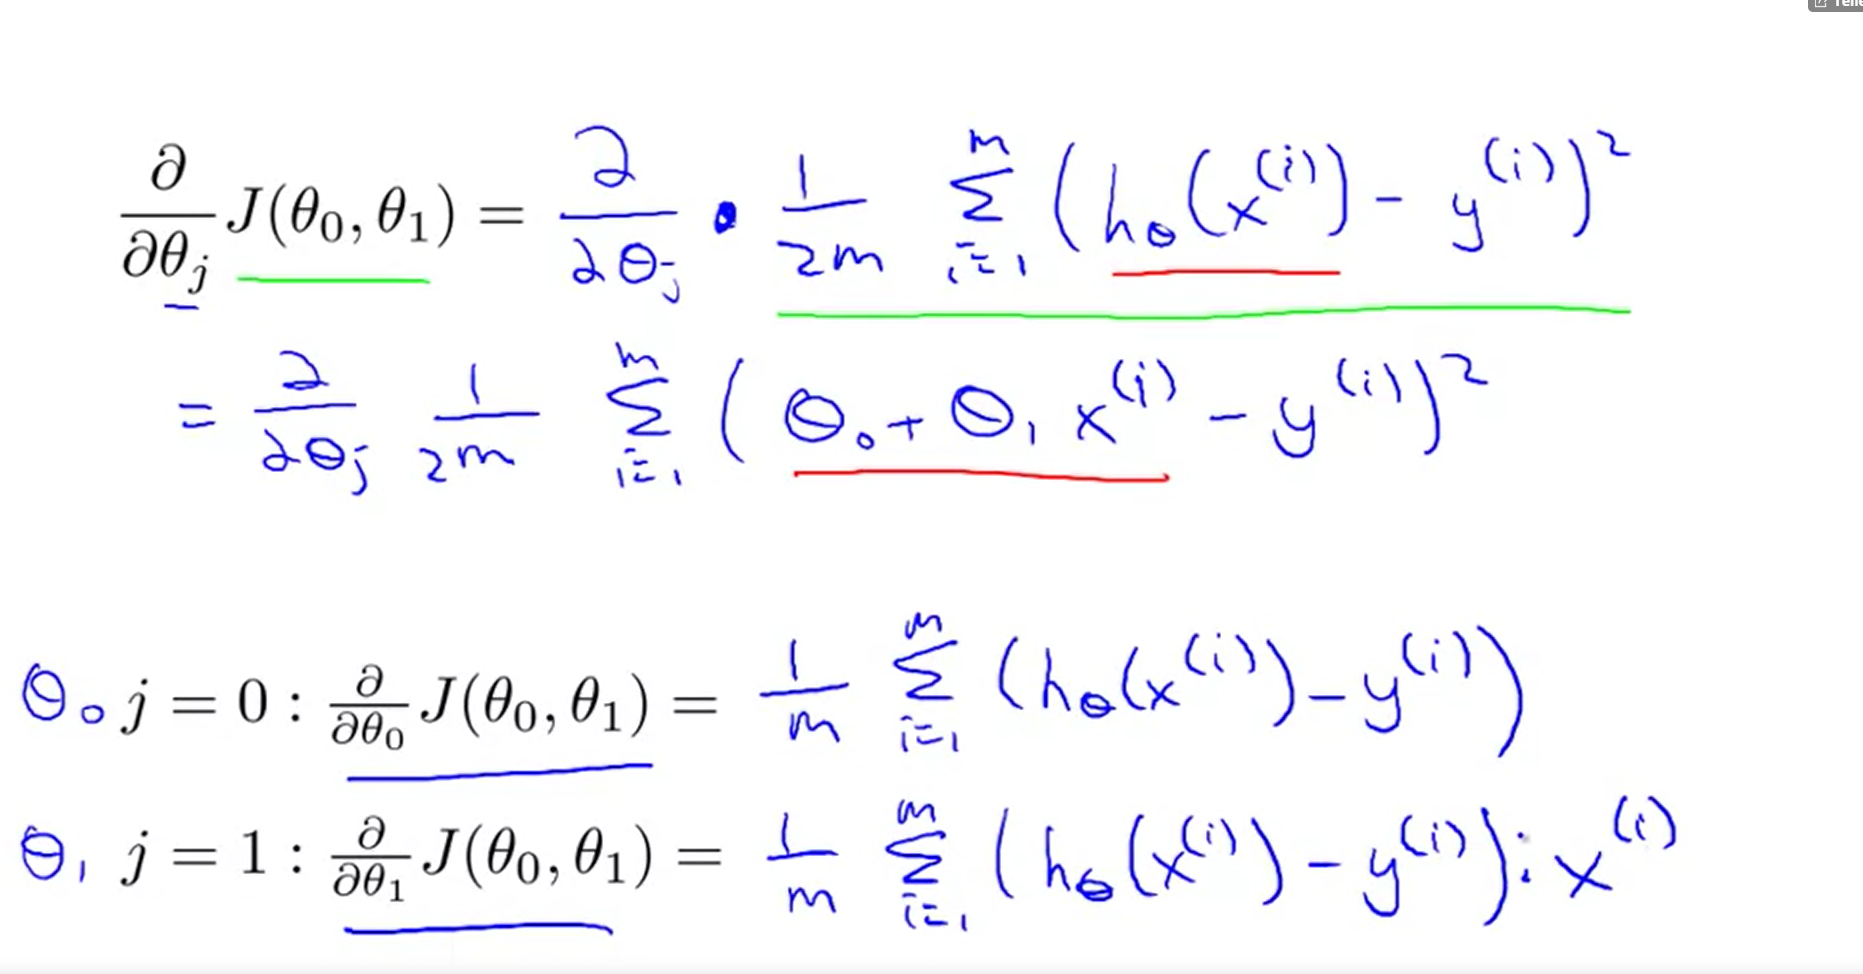

We can observe that the derivative is negative if we compute $\frac{1}{m}\sum_{i=1}^{m} h_\theta - y$ for $\theta_1<1$ and $\theta_1$ is increased in the next iteration.

Likewise the derivative is positive for $\theta_1>1$ and $\theta_1$ is decreased in the next iteration. 

Example:

$\frac{1}{3} ((0.5 \cdot 1 - 1) + (0.5 \cdot 2 - 2) + (0.5 \cdot 3 - 3)) = -1$

$\frac{1}{3} ((1.5 \cdot 1 - 1) + (1.5 \cdot 2 - 2) + (1.5 \cdot 3 - 3)) = 1$

Consequently, we subtract $\theta$ in the next iteration by &#177;$1\cdot \alpha$. Depending on how we set the learning parameter, we can see that we will take smaller or bigger steps. 

**Normalization or Feature scaling**
Another thing that we need to pay attention to is **normalization**. If we look at the housing example, we can see that we are dealing with quite high values for y. This means that we need to settle on a super small learning parameter since otherwise we will quickly diverge. Further, a large imbalance in our input features may result in a skewed contour plot. If we have two features of different magnitude (e.g. size=0-2000 feet vs bedrooms=1-5), then the contour plot will be stretched along the size because of it's magnitude. To resolve this problem, we can use **feature scaling** or **normalize** the values which ensures that the features cover the same range. We simply scale our features into approximately a range between -1 and 1. They don't all have to be exactly in this range but they should be around it.

**Mean normalization**
We can also scale the features areound the mean. $\frac{x_i-\mu_i}{\max(x_i)-\min(x_i)}$. This will scale the features in range $-0.5 \leq x_i \leq 0.5$

**Effect of the learning parameter**
In general, a smaller learning rate results in smaller steps which leads to smaller convergence (i.e. the algorithm runs longer). However, if we set the learning rate too high, we may even diverge. For example, if we set $\alpha=1$ with an initial $\theta=0.5$, you will see that $\theta$ will jump between 0.5 and 1.5 forever. If we set $\alpha>1$ (in this example) we will in fact diverge and make bigger steps with every iteration, getting further away from the minimum.

Observer that the closer we are to the minimum, the smaller the derivative will be. Therefore, we don't need to decrease $\alpha$ as we approach the minimum. In order to get observe divergence, we can plot the cost function on the number of iterations to get a visual representation of how our cost function behaves. 
Further, we can also check the improvement of J($\theta$) in every iteration and stop if the improvement is less than $10^{-3}$


The figure below shows the effect of the learning parameter on the gradient descent algorithm.

In [12]:
def update_theta(theta,alpha,x,y):
    return theta - alpha*np.sum(theta*x-y)/len(x)

Text(0.5, 1.0, 'Cost function (θ₁=0.5, α=1.04)')

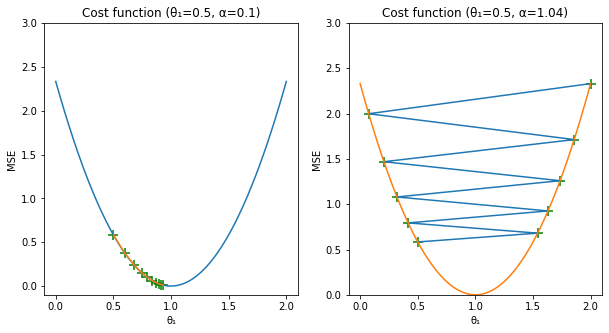

In [13]:
alpha=0.1
theta=[0.5]
error=[]
x = np.array([1,2,3])
y = np.array([1,2,3])

fig, (J1, J2) = plt.subplots(1, 2, figsize=(10,5))

#Left plot with alpha=0.5 
for i in range(10):
    y_hat = np.multiply(x, theta[-1])
    error.append(mse(y, y_hat))
    theta.append(update_theta(theta[-1], alpha, x, y))
theta.pop()
J1.scatter(theta, error, color='g', marker='+', s=100)
J1.plot(var.theta, var.cost, linestyle='solid')
J1.plot(theta, error, linestyle='solid')
J1.set_xlabel('\u03B8\u2081')
J1.set_xlim(-0.1, 2.1)
J1.set_ylabel('MSE')
J1.set_ylim(-0.1, 3)
J1.set_title("Cost function (\u03B8\u2081=0.5, \u03B1=0.1)")

alpha=1.04
theta=[0.5]
error=[]
#Left plot with alpha=0.5 
for i in range(10):
    y_hat = np.multiply(x, theta[-1])
    error.append(mse(y, y_hat))
    theta.append(update_theta(theta[-1], alpha, x, y))
theta.pop()

#Right plot with alpha=1.1
J2.scatter(theta, error, color='g', marker='+', s=100)
J2.plot(theta, error, linestyle='solid')
J2.plot(var.theta, var.cost, linestyle='solid')
J2.set_xlabel('\u03B8\u2081')
J2.set_xlim(-0.1, 2.1)
J2.set_ylabel('MSE')
J2.set_ylim(0, 3)
J2.set_title("Cost function (\u03B8\u2081=0.5, \u03B1=1.04)")


Let's see how this applies to the housing example that we had in the beginning:



In [14]:
np.random.seed(0)
class Linear_Regression(object):
    def __init__(self):
        self.alpha = 0.3
        #Load house area and normalize it
        self.x = np.array(houses['Area'])
        self.x = self.x/max(self.x)
        #Load price and normalize it
        self.y = np.array(houses['Price'])
        self.y = self.y/max(self.y)
        self.cost = []
        self.theta0 = [-0.75]#[np.random.randint(2)-1]
        self.theta1 = [1.5]#[np.random.randint(2)-1]
        
    def update_thetas(self):
        y_hat = self.get_hypothesis()
        temp1 = self.theta0[-1] - (1/len(self.x))*self.alpha*np.sum((y_hat-self.y))
        temp2 = self.theta1[-1] - (1/len(self.x))*self.alpha*np.sum((y_hat-self.y)*self.x)
        self.theta0.append(temp1)
        self.theta1.append(temp2)
        
    def get_hypothesis(self):
        return self.theta0[-1] + np.multiply(self.x, self.theta1[-1])
    
    def get_hypothesis_line(self,i=-1):
        x = np.linspace(0, 1, 10, endpoint=True)
        y = self.theta0[i] + np.multiply(x, self.theta1[i])
        return x,y
    
    def get_error(self, y_hat):
        self.cost.append(np.sum(np.square(self.y-y_hat))/(2*len(y_hat)))
        return self.cost[-1]

In [15]:
try:

    lin_reg = Linear_Regression()
    fig, (h, J) = plt.subplots(1, 2, figsize=(10,5))

    #Plot values for left graph (hypothesis function)
    line, = h.plot(x,y, lw=2)
    h.scatter(lin_reg.x, lin_reg.y, color='r', marker='+')
    h.set_xlabel('x')
    h.set_xlim(0, 1)
    h.set_ylabel('y', rotation=0)
    h.set_ylim(0, 1)
    h.set_title("Hypothesis for \u03B8\u2081=[0,2] (function of x)")

    #Perform gradient descent to find the best fit until our error is less than 0.001
    error = 1
    while error>0.005:
        y_hat = lin_reg.get_hypothesis()
        error = lin_reg.get_error(y_hat)
        lin_reg.update_thetas()

    #Calculate values for contour plot
    T0 = np.linspace(-1, 1, 100)
    T1 = np.linspace(0, 2, 100)
    mse_vals = np.zeros(shape=(T0.size, T1.size))
    Tm0, Tm1 = np.meshgrid(T0, T1)

    for i, t0 in enumerate(T0):
        for j, t1 in enumerate(T1):
            y_hat = t0 + np.multiply(x, t1)
            mse_vals[i][j] = np.sum(np.square(y-y_hat))/(2*len(y_hat))

    #Plot contour plot for cost function value and gradient steps
    J.contour(Tm0, Tm1, mse_vals, levels=20)
    scat = J.scatter([0], [1], color='r', marker='+')
    line1, = J.plot([0], [1], lw=2)
    ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
    J.set_xlabel('\u03B8\u2080')
    J.set_ylabel('\u03B8\u2081')
    J.set_title("Gradient descent on contour plot of cost function")

    print('Plotting animation')
    # initialization function: plot the background of each frame
    def init():
        return line,

    # animation function.  This is called sequentially
    def animate(i):
        x,y = lin_reg.get_hypothesis_line(i)
        scat.set_offsets(np.c_[lin_reg.theta0[:i], lin_reg.theta1[:i]])
        line1.set_data(lin_reg.theta0[:i], lin_reg.theta1[:i])
        line.set_data(x,y)
        return line,

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                       frames=len(lin_reg.theta0), interval=50, blit=True)

    plt.close(anim._fig)

    #anim.save("../data/week1/figures/linear_regression.gif", writer=animation.PillowWriter(fps=30))

    display(HTML(anim.to_html5_video()))
    
except:
    print("Cannot load animation. Loading gif instead")
    display(HTML('<img src="../data/week1/figures/linear_regression.gif">'))


Plotting animation


From the gif we can see that the two parameters have a different effect on the cost function. Changing the value of $\theta_1$ has a higher effect on the cost than changing the value of $\theta0$. We can see this in the interactive plot below. The cost function is therefore a valley shape.

<IPython.core.display.Javascript object>


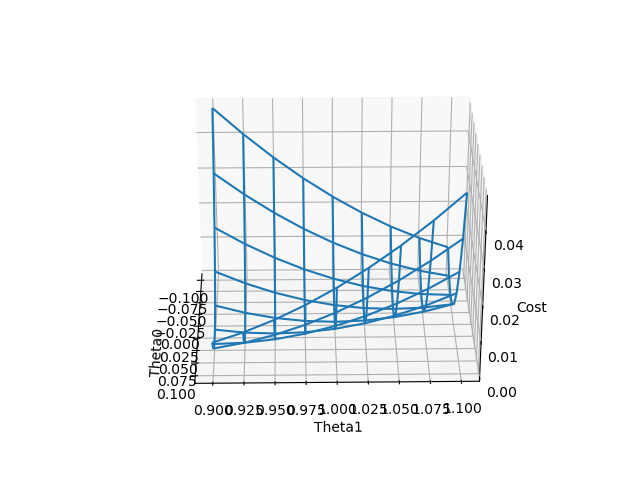

In [16]:
T0 = np.linspace(-0.1, 0.1, 9)
T1 = np.linspace(0.9, 1.1, 9)
mse_vals = np.zeros(shape=(T0.size, T1.size))
Tm0, Tm1 = np.meshgrid(T0, T1)

for i, t0 in enumerate(T0):
    for j, t1 in enumerate(T1):
        y_hat = t0 + np.multiply(x, t1)
        mse_vals[i][j] = np.sum(np.square(y-y_hat))/(2*len(y_hat))
        
        
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
ax.plot_wireframe(Tm0, Tm1, mse_vals, rstride=1, cstride=1)
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('Cost')

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)


## Multivariate Linear Regression

Above we only had one single feature that we used to predict our output value. We can also have multiple, different values.
If we come back to our housing example from earlier, we have different features. We will use the following notation:
- $n$ = number of features
- $x^{(i)}$ = input (features) of the $i^{th}$ training example
- $x^{(i)}_{j}$ = value of feature j in $i^{th}$ training example

Further, in multivariate linear regression, we write our hypothesis function as indicated below:

\begin{align*}
  h(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \dots + \theta_nx_n
\end{align*}

For convenience we will define $x_0 = 1$ which allows us to simplify our equation. Now, both the feature vector and the input vector are of the same length and we can write:

\begin{align}
  x = 
  \begin{bmatrix}
    x_{0}\\
    x_{1}\\
    \vdots \\
    x_{n}\\
  \end{bmatrix} \in \mathbb{R}^{n+1}
  \quad\quad\quad
  \theta = 
  \begin{bmatrix}
    \theta_{0}\\
    \theta_{1}\\
    \vdots \\
    \theta_{n}\\
  \end{bmatrix} \in \mathbb{R}^{n+1}
\end{align}

Having the additional $x_0$ allows us to write the equation as a vector multiplication:

\begin{align*}
  h(x) = \theta^Tx
\end{align*}

## Gradient descent for multiple features

When using gradient descent on multiple features, we get the following update rule (where we have to do simultaneous updates for every $\theta$. The update rule hardly changes to what we had in our prior example.

{<br>
&emsp;&emsp;$\theta_j$$ := \theta_j - \alpha\frac{1}{m}\sum^{m}_{i=1}(h_\theta(x^{(i)}-y^{(i)})x^{(i)}_j$<br>
}

## Polynomial regression
We can also build our own features from existing features. If we want to fit a qubic model, we can simply build the following:

$h_\theta(x) = \theta_0 + \theta_1(size) + \theta_2(size)^2 + \theta_3(size)^3 $

If we do this, then feature scaling becomes increasingly important!


# Normal equation

Gradient descent is an iterative process to converge and the runtime of the algorithm is unknown. Further, we have the need to choose a learning parameter $\alpha$. We can avoid this and solve for our optimal values analytically using the **Normal Equation**.

From our input data, we build ourselves a **mxn+1** matrix X and a **mx1** y vector. Having this information, we can compute the optimal values for $\theta$ vector with the normal equation:

\begin{align}
\theta = (X^TX)^{-1}X^Ty
\end{align}

We build the Design Matrix X, using the individual training data from each input:
\begin{align}
  x^{(i)} = 
  \begin{bmatrix}
    x_{0}^{(i)}\\
    x_{1}^{(i)}\\
    \vdots \\
    x_{n}^{(i)}\\
  \end{bmatrix} \in \mathbb{R}^{n+1}
  \quad\quad\quad
  X = 
  \begin{bmatrix}
    -(x^{(1)})^T-\\
    -(x^{(2)})^T-\\
    \vdots \\
    -(x^{(n)})^T-\\
  \end{bmatrix} 
  \quad\quad\quad
  y = 
  \begin{bmatrix}
    y^{(1)}\\
    y^{(2)}\\
    \vdots \\
    y^{(n)}\\
  \end{bmatrix} 
\end{align}


When using the normal equation, we don't need to apply feature scaling. 

### When to use what?
$m$ training examples, $n$ features

| <u>Gradient Descent</u> | <u>Normal Equation</u>
|:---:                              |:---:|
| Need to choose $\alpha$           | Don't need to choose $\alpha$ |
| Needs many iterations             | Needs one single computation |
| Works well even when $n$ is large | Need to compute $(X^TX)^{-1}$ (slow if $n$ is large)|


**End linear regression**